In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [4]:
y.shape, tx.shape, weight.shape

((10000,), (10000, 2), (10000,))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    #MSE
    error = y - np.dot(tx, w)
    size = y.shape[0]
    return np.dot(error.T, error)/(2*size)

In [6]:
np.dot(np.array([[1, 2], [3, 4]]), np.array([4, 4]).T)

array([12, 28])

# 2 Grid Search

Fill in the function `grid_search()` below:

In [7]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i, weight_1 in enumerate(w0):
        for j, weight_2 in enumerate(w1):
            losses[i, j] = compute_loss(y, tx, np.array([weight_1, weight_2]).T)
            
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.424483146782485, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.022 seconds


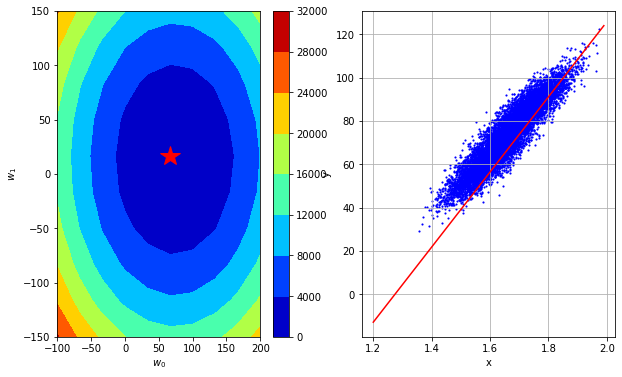

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [9]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    size = y.shape[0]
    error = y - np.dot(tx, w)
    gradient = -1*np.dot(tx.T, error)/size
    return compute_loss(y, tx, w), gradient

In [10]:
print(compute_gradient(y, tx, np.array([100, 20]).T))
print(compute_gradient(y, tx, np.array([50, 10]).T))

(393.250263848868, array([26.706078  ,  6.52028757]))
(292.7434883040181, array([-23.293922  ,  -3.47971243]))


Please fill in the functions `gradient_descent` below:

In [11]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss, gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [12]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759168, w0=51.30574540147361, w1=9.435798704492269
Gradient Descent(1/49): loss=265.3024621089606, w0=66.69746902191571, w1=12.266538315839997
Gradient Descent(2/49): loss=37.87837955044127, w0=71.31498610804834, w1=13.115760199244328
Gradient Descent(3/49): loss=17.410212120174478, w0=72.70024123388814, w1=13.37052676426563
Gradient Descent(4/49): loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.386020684743528, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638301, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412119, w1=13.479

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [32]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
#     size = y.shape[0]
#     n = np.randint(0, size, size=1)
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=10):

            loss, gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)

            w = w - gamma * gradient
            # store w and loss
            ws.append(w)
            losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [33]:
ix = np.random.randint(0, 10, size=5)

np.array(range(10))[ix]

array([0, 1, 6, 8, 7])

In [34]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.8
batch_size = 100

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=11.727787599206222, w0=73.12543596244419, w1=13.774883213042711
Stochastic Gradient Descent(1/49): loss=16.35918522778361, w0=73.21976005626779, w1=12.872286829753255
Stochastic Gradient Descent(2/49): loss=14.241474959552015, w0=73.76121909205932, w1=13.040940593037094
Stochastic Gradient Descent(3/49): loss=16.161589231055427, w0=72.86061675933205, w1=13.109579551069759
Stochastic Gradient Descent(4/49): loss=17.04516057119697, w0=73.26584620485286, w1=13.374196342244003
Stochastic Gradient Descent(5/49): loss=12.463701642912602, w0=73.7557217360427, w1=13.672614127321621
Stochastic Gradient Descent(6/49): loss=15.666135786055202, w0=73.43830646926855, w1=13.040475323877105
Stochastic Gradient Descent(7/49): loss=13.010257667530322, w0=73.56929517151154, w1=13.345109175232999
Stochastic Gradient Descent(8/49): loss=15.591739266663863, w0=72.69715839187222, w1=13.096468784070007
Stochastic Gradient Descent(9/49): loss=19.097959686534026, w0=73.2

In [21]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

MAE : non-smooth function => subgradient

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)